# Data Exploration and Tokenization

Hello everyone! For this notebook we will taking our first dive into the dataset. This is our first step towards training and deploying our two machine learning models. This Kaglle dataset titled [Sentiment140 dataset with 1.6 million tweets](http://localhost:8888/tree/ml-cloud-pipeline-generative-tweets) has been immensely useful in my learning of NLP and text processing. I suggest you check out my previous [ML project for Tweet sentiment classification](https://github.com/adma224/aws-real-time-sentiment-analysis). We will be ignoring most of the columns from the dataset and only keeping the column **text**.

Our goals for this notebook are:

- Understand our data and determine a noise reduction technique
- Cleanse and pre-process the data
- Tokenize the dataset and save it

Since we will be using this dataset for generative AI, we will only be performing data cleansing techniques such as 
- removal of hashtags and mentions
- removal of emojis
- removal of website URLs
- removal of punctuation
- contarction transformation (i.e. can't -> cannot)
- lowercasing

Any other pre-processing steps might have an invert effect when we train our model. Since we want our model to learn trends through text data and generate similar text, we want to preserve the vocabulary as much as possible

In [34]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import TweetTokenizer
import contractions
from nltk.corpus import stopwords

We first read the dataset from a csv file. Here we are assuming that the file is titled "tweets.csv".

In [27]:
DATASET_COLUMNS = ['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('tweets.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
print(df.columns)

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')


In [29]:
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [25]:
for i, phrase in enumerate(df['text']):
    print(phrase)
    if i >= 5:
        break

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
my whole body feels itchy and like its on fire 
@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
@Kwesidei not the whole crew 


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
import re
import contractions
from nltk.tokenize import TweetTokenizer

def preprocess_text(text):
    text = contractions.fix(text)
    
    text = re.sub(r'http[s]?://[^\s]+', '', text)
    text = re.sub(r'www\.[a-zA-Z0-9-]+\.[^\s]+', '', text)
    
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)
    
    text = re.sub(r'[^\w\s]', '', text)
    
    text = re.sub(r'\d+', '', text)
    
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)


In [7]:
tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)

def tokenize_text(text):
    tokens = tokenizer.tokenize(text)
    return tokens

df['tokens'] = df['cleaned_text'].apply(tokenize_text)

print(df[['cleaned_text', 'tokens']].head())

                                        cleaned_text  \
0     Awww that is a bummer  You shoulda got Davi...   
1  is upset that he cannot update his Facebook by...   
2   I dived many times for the ball Managed to sa...   
3    my whole body feels itchy and like its on fire    
4   no it is not behaving at all i am mad why am ...   

                                              tokens  
0  [Awww, that, is, a, bummer, You, shoulda, got,...  
1  [is, upset, that, he, cannot, update, his, Fac...  
2  [I, dived, many, times, for, the, ball, Manage...  
3  [my, whole, body, feels, itchy, and, like, its...  
4  [no, it, is, not, behaving, at, all, i, am, ma...  


In [8]:
df[['target', 'tokens']].to_csv('preprocessed_tweets.csv', index=False)

In [9]:
import ast

all_tokens = []

for tokens in df['tokens']:
    all_tokens.extend(tokens)
    


In [10]:
from collections import Counter

token_frequencies = Counter(all_tokens)

word_freq_df = pd.DataFrame(token_frequencies.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

word_freq_df

,Word,Frequency
0,I,653493
1,to,603831
2,the,492128
3,is,367299
4,a,367049
...,...,...
504727,REIN,1
504728,WEAKENED,1
504729,ltbeegt,1
504730,sleepzombie,1


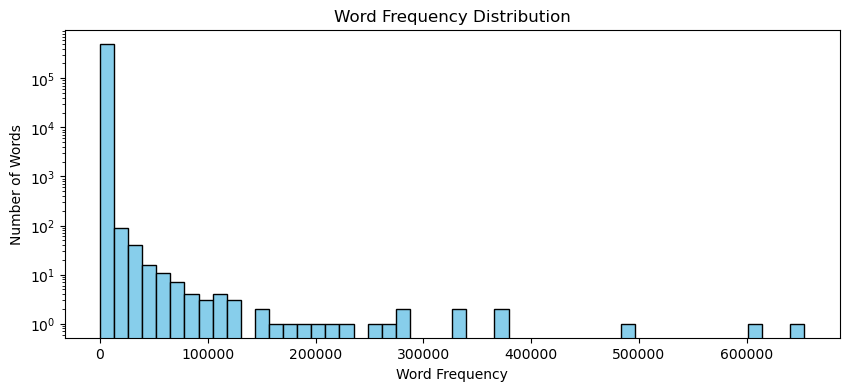

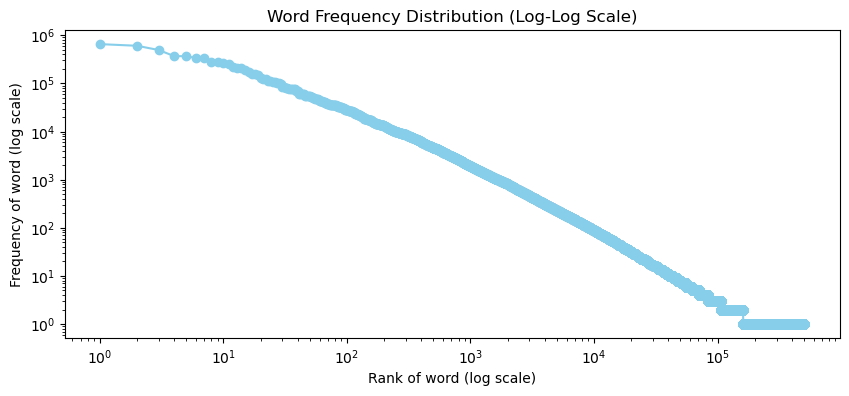

In [14]:
import matplotlib.pyplot as plt


# Histogram of word frequencies
plt.figure(figsize=(10, 4))
plt.hist(word_freq_df['Frequency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Word Frequency Distribution')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.yscale('log')  # Use log scale for better visibility of lower frequencies
plt.show()

# Log-log plot
plt.figure(figsize=(10, 4))
plt.loglog(range(1, len(word_freq_df) + 1), word_freq_df['Frequency'].sort_values(ascending=False), marker='o', linestyle='-', color='skyblue')
plt.title('Word Frequency Distribution (Log-Log Scale)')
plt.xlabel('Rank of word (log scale)')
plt.ylabel('Frequency of word (log scale)')
plt.show()

In [12]:
word_freq_df.describe()

,Frequency
count,504732.000000
mean,40.669643
std,2202.553500
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,653493.000000


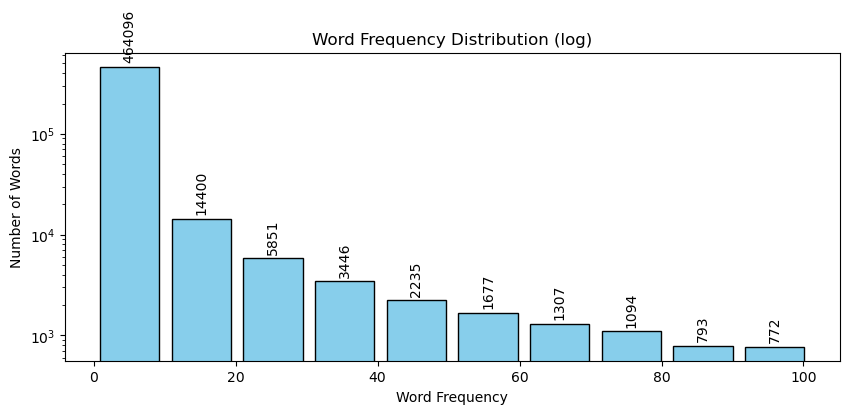

In [15]:

data = word_freq_df['Frequency']
bins = 10

x_max = x_line +1 
hist, bin_edges = np.histogram(data, bins=bins, range=(0, x_max))

fig, ax = plt.subplots(figsize=(10, 4))
width_scaling_factor = 0.8
for i in range(len(hist)):
    height = hist[i]
    center = (bin_edges[i] + bin_edges[i+1]) / 2
    original_width = bin_edges[i+1] - bin_edges[i]
    adjusted_width = original_width * width_scaling_factor+0.3
    
    ax.bar(center, height, align='center', width=adjusted_width, color='skyblue', edgecolor='black')
    if height > 0:
        ax.annotate(f'{height}', xy=(center, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', rotation=90)

ax.set_title('Word Frequency Distribution (log)')
ax.set_xlabel('Word Frequency')
ax.set_ylabel('Number of Words')
ax.set_yscale('log')

plt.show()